In [86]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
file = "data/combined_thin.csv"
dfnew = pd.read_csv(file,low_memory=False)

In [8]:
df=dfnew.loc[dfnew['review_scores_rating']>0]

In [9]:
df.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Long term stays allowed,Pool,Private bathroom,Private entrance,Private living room,Refrigerator,Smoking allowed,Stove,Suitable for events,TV
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0
1,6304928,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,0,0,0,0,1
4,3808709,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,...,0,0,0,0,0,0,0,0,0,1
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,0,0,0,0,0,0,0,0,0,1


In [10]:
bins = [0, 50, 100, 200 ,300, 9999]
group_names = ["<50", "50 to 100", "100 to 200", "200 to 300", ">300"]
df["review_count"] = pd.cut(df["number_of_reviews"], bins, labels=group_names)

C:\Users\jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
lst=[]
lst=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel', 'Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher', 'Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress', 'First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym',
       'Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron', 'Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed',
       'Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator', 'Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

lst1=['Accessible', 'Air conditioning', 
       'BBQ grill', 'Baby friendly','Changing table', 'Bath towel']
lst2=['Bathtub',
       'Beachfront', 
       'Breakfast',  'Coffee maker',
        'Dishwasher']
lst3=['Doorman',
       'Elevator', 'Extra pillows and blankets',
       'Family/kid friendly',
       'Firm mattress']
lst4=['First aid kit',
       'Free parking', 'Game console',
       'Garden or backyard', 'Gym']
lst5=['Heating',
         'Hot tub', 
       'Indoor fireplace', 'Internet', 'Iron']
lst6=['Keypad', 'Kitchen',
       'Laptop friendly workspace', 'Lock on bedroom door',
       'Long term stays allowed']
lst7=['Pool', 'Private bathroom', 'Private entrance', 'Private living room',
       'Refrigerator']
lst8=['Smoking allowed',
       'Stove', 'Suitable for events', 'TV']

In [12]:
df1 = df[['review_count','review_scores_rating']].groupby('review_count').mean()
df1b=df1.rename(columns={'review_scores_rating': 'AverageRating'})

In [13]:
for each in lst:
    df2 = df.loc[df[each]>0]
    df2b =df2[['review_count','review_scores_rating']].groupby('review_count').mean()
    df1b=df1b.join(df2b.rename(columns={'review_scores_rating': each}), on='review_count',how='left')

In [33]:
df_chart = df1b.reset_index()

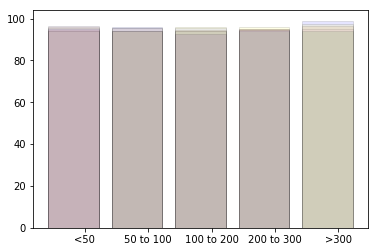

In [90]:
lstcolors=['red','orange','green','blue','yellow','indigo','violet']
x = df_chart['review_count']

fig, ax = plt.subplots()
N=5
ind = np.arange(N)
width = 0.35 
t=0
AverageRating = ax.bar(x, df_chart['AverageRating'],alpha=.1,  color=color, edgecolor = "black",linewidth=1)
for each in lst1:
    t=t+1
    color = lstcolors[t]
    seach = ax.bar(x, df_chart[str(each)],alpha=.1,  color=color, edgecolor = "black",linewidth=1)
ax.set_xticks(ind + width / 2)
    #ax.ylim(80,105)
#ax.legend((lst1[0],lst1[1],lst1[2],lst1[3],lst1[4],lst1[5]),(lst1[0],lst1[1],lst1[2],lst1[3],lst1[4],lst1[5]))
#ax.title('Average Overal Rating vs Average Rating with Amenities by Property type')
#ax.ylabel('Average Rating')
#ax.xlabel('Property Type')
#ax.tight_layout()
#plt.savefig("Images/Chart1_Set3.png")
plt.show()
